In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
%load_ext autoreload
%autoreload 2

## 1. Particle in an Infinite Square Well

Here we begin with the time-dependent Schrödinger equation in the x-basis, inside the well:

$$
\begin{align}
i\hbar\dfrac{\partial \psi}{\partial t} &= \dfrac{-\hbar^2}{2m}\dfrac{\partial \psi}{\partial x^2} \label{eq1}\tag{1}
\end{align}
$$

#### Forward Difference in Time

We use the finite difference method to solve `Equation 1`. First, we use the forward difference in time:

$$
\begin{align}
\dfrac{\partial \psi}{\partial t} &= \dfrac{\psi(x, t + \Delta t) - \psi(x, t)}{\Delta t} \tag{2} \\
&= \dfrac{\psi_n^{k+1} - \psi_n^k}{\Delta t} \tag{2} \\
\end{align}
$$

#### Central Difference in Space

Next, we use central difference in space:

$$
\begin{align}
\dfrac{\partial^2 \psi}{\partial x^2} &= \dfrac{\psi(x + \Delta x, t) + \psi(x - \Delta x, t) - 2\psi(x, t)}{(\Delta x)^2} \tag{3} \\
&= \dfrac{\psi_{n+1}^{k} + \psi_{n-1}^{k} - 2\psi_n^k}{(\Delta x)^2} \tag{4} \\
\end{align}
$$

#### Combining the Equations

$$
\begin{align}
\begin{bmatrix}
           \psi_0^{k+1} \\
           \psi_1^{k+1} \\
           \psi_2^{k+1} \\
           \vdots \\
           \psi_N^{k+1}
         \end{bmatrix} &= \begin{bmatrix} 
    0 & 0 & 0 & 0 & \dots & 0 \\
    \sigma & 1-2\sigma & \sigma & 0 & \dots & 0 \\
    0 & \sigma & 1-2\sigma & \sigma & \dots & 0 \\
    \vdots & & & \ddots & \\
    0 & \dots &  & \sigma & 1-2\sigma & \sigma \\
    0 & \dots & & 0 & 0 & 0
    \end{bmatrix}
\begin{bmatrix}
           \psi_0^k \\
           \psi_1^k \\
           \psi_2^k \\
           \vdots \\
           \psi_N^k
         \end{bmatrix}
\end{align}
$$

where
$$
\sigma = i \dfrac{\hbar}{2m_e}\dfrac{\Delta t}{(\Delta x)^2}
$$

In [147]:
h_bar = 1.054571817*10**34 # reduced Planck constant
m = 9.1093837015*10**31 # mass of an electron
a = 40 # length of the well
dx = 0.001
dt = 0.000000001
sigma = complex(0, (h_bar*dt)/((dx)**2*2*m))

In [148]:
print(sigma)

0.05788381802527148j


In [89]:
def psi_initial(dx, a, n=1):
    u_data = []
    x_data = np.arange(0, a+dx, dx)
    for x in x_data:
        u_data.append(np.sqrt(2/a)*np.sin(np.pi*x*n/a))
    return u_data, x_data

In [149]:
N = int(a/dx)
K = 2000

In [150]:
def finite_difference(u_initial, dx, dt, N, K):
    A = np.zeros((N+1, N+1), dtype=complex)
    for n in range(1, N):
            A[n][n-1] = sigma
            A[n][n] = 1-2*sigma
            A[n][n+1] = sigma
        
    u_k = u_initial
    U = [u_k]
    print(len(u_k))
    print(np.shape(A))
        
    for k in range(1, K):
        u_k = np.matmul(A, u_k)
        U.append(u_k)
    
    return U

In [151]:
n = 1
psi_0, x_data = psi_initial(dx, a, n)
U = finite_difference(psi_0, dx, dt, N, K)

40001
(40001, 40001)


KeyboardInterrupt: 

/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWar

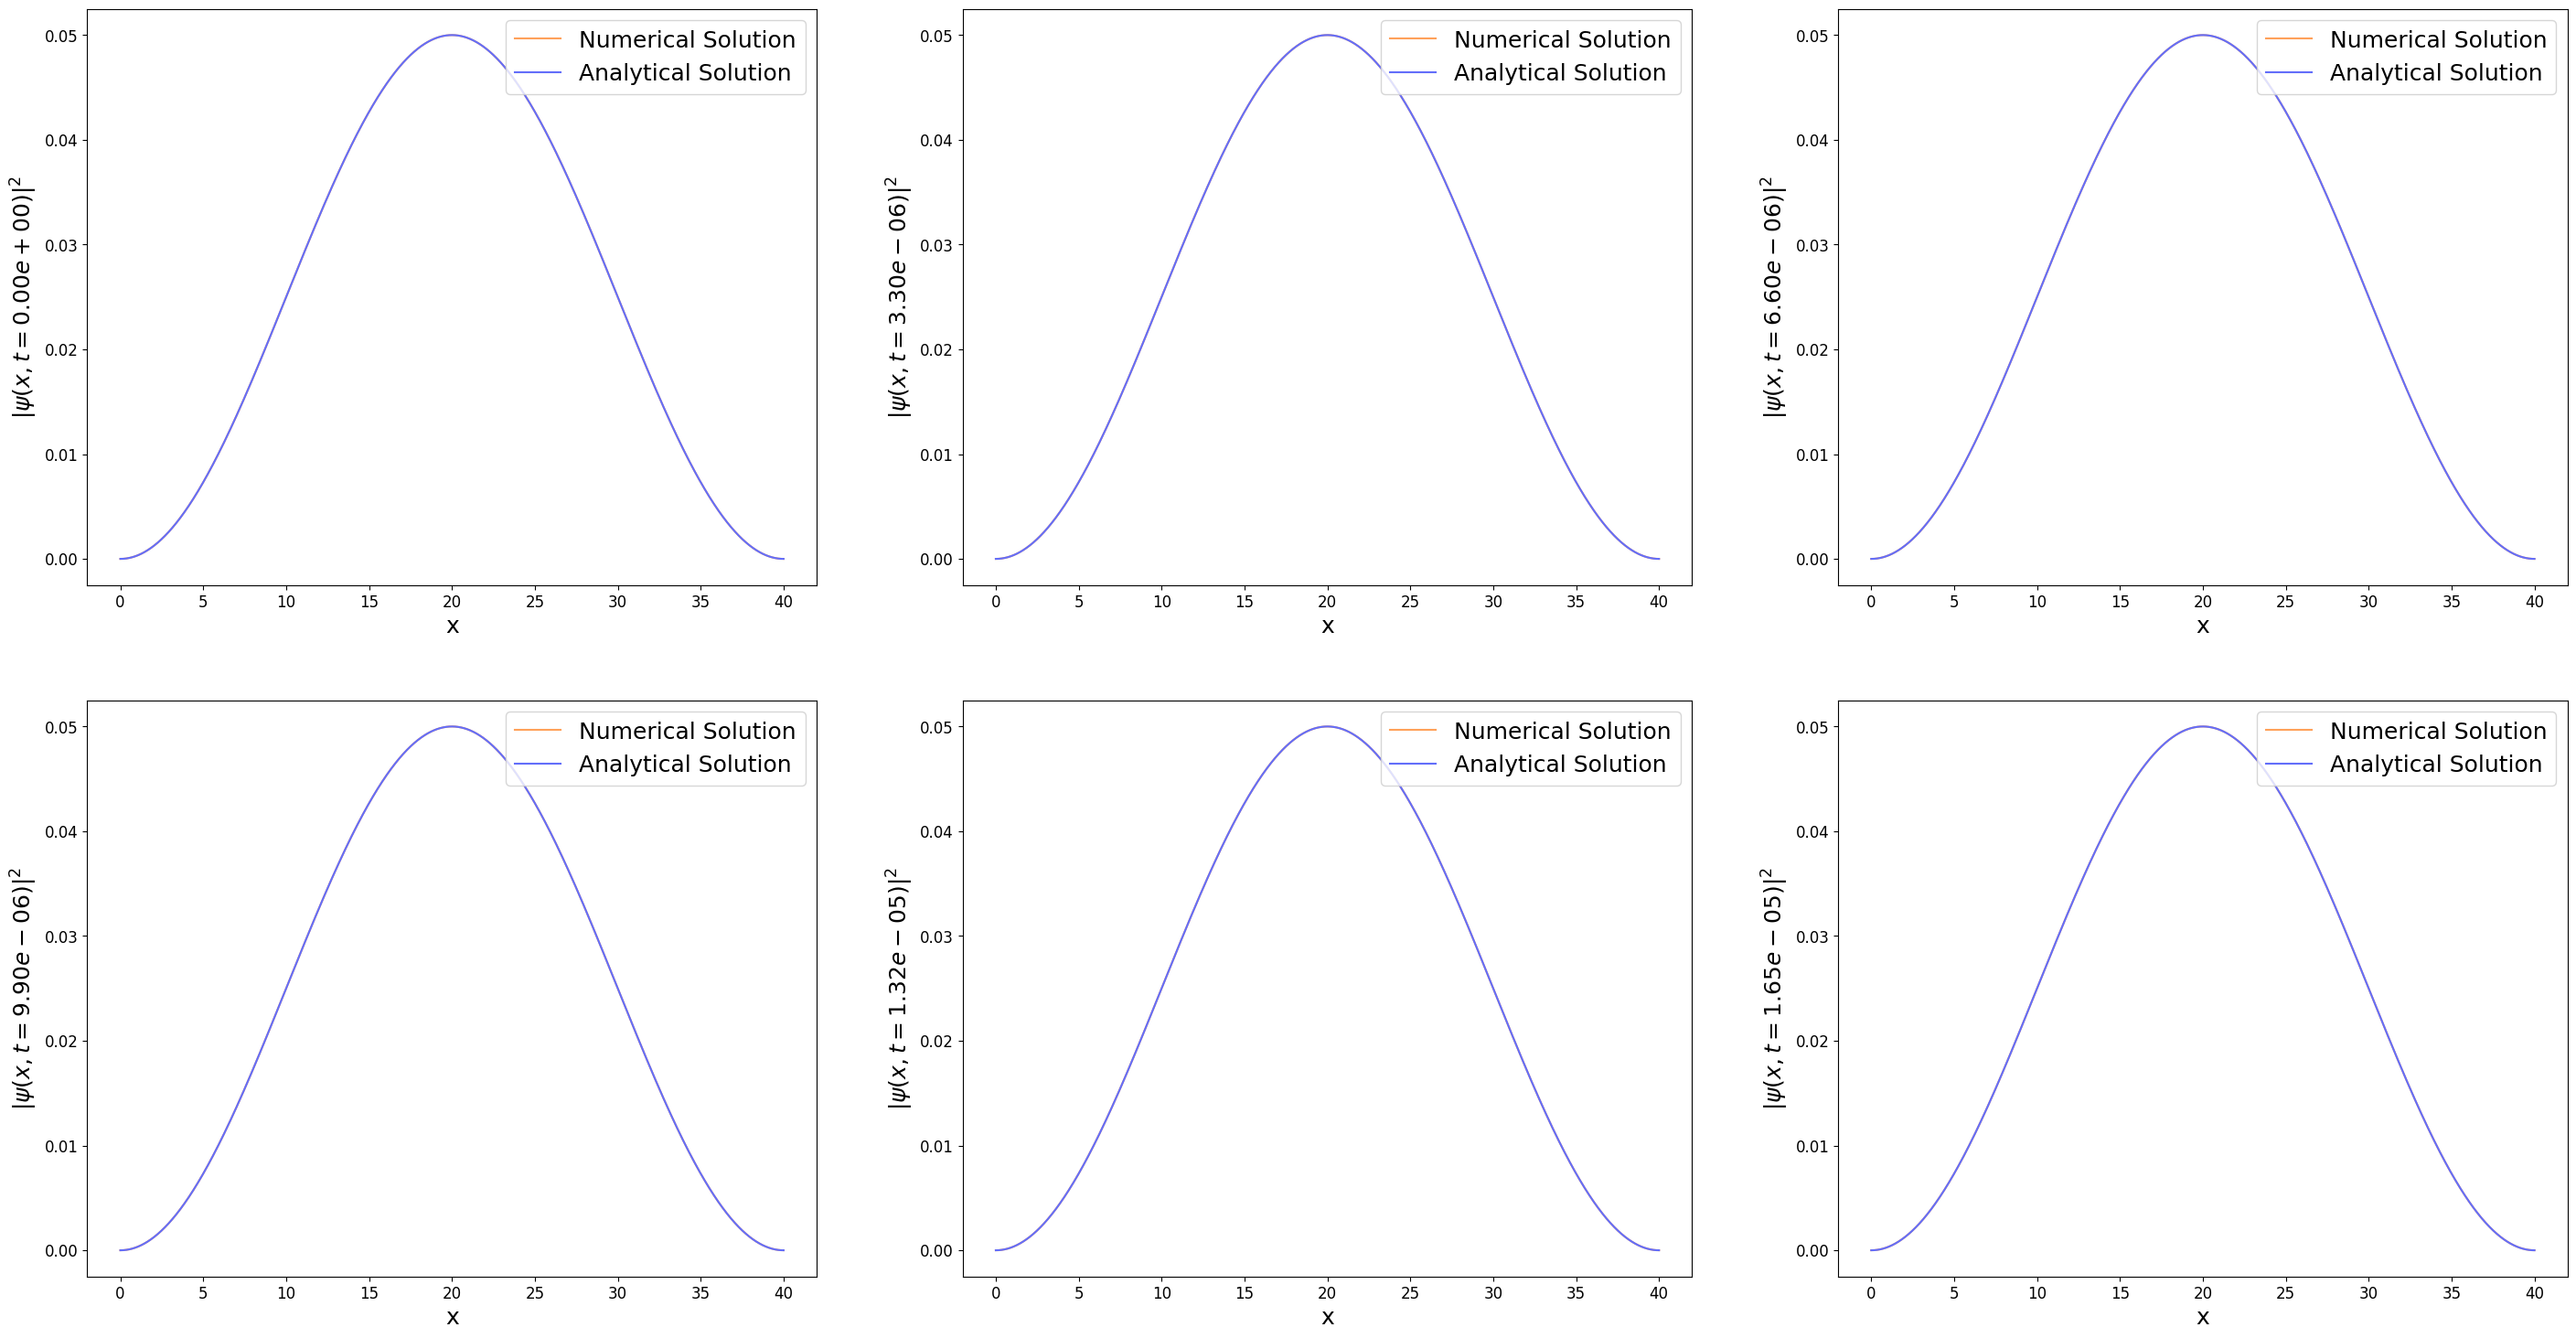

In [131]:
params = {'legend.fontsize': 18,
          'axes.labelsize': 18,
          'axes.titlesize': 18,
          'figure.titlesize': 22,
          'xtick.labelsize' :12,
          'ytick.labelsize': 12,
          'mathtext.fontset': 'custom',
          'mathtext.rm': 'Bitstream Vera Sans',
          'mathtext.it':'Bitstream Vera Sans:italic',
          'grid.color': 'k',
          'grid.linestyle': ':',
          'grid.linewidth': 0.5
         }
plt.rcParams.update(params)

fig, axes = plt.subplots(2, 3, figsize=(35,18))
# fig.suptitle("Finite Difference Method for a Particle in a 1D Well, Stationary State, n = 1")

k = 0
for ax in axes.flat:
    t = k*dt
    psi_pred = [psi.conjugate()*psi for psi in U[k]]
    psi_0_prob = [psi.conjugate()*psi for psi in psi_0]
    

    ax.plot(x_data, psi_pred, label="Numerical Solution", color="#FFA15A")
    ax.plot(x_data, psi_0_prob, label="Analytical Solution", color="#636EFA")
    ax.legend(loc="upper right")

    ax.set_xlabel("x")
    t = np.format_float_scientific(t, precision=2, unique=False, trim='k')
    ax.set_ylabel(f'$|\psi(x, t={t})|^2$')
    k = k + int(K/6)
# plt.show()
plt.savefig(f'finite_difference_method_infinite_square_well_n_{n}.png')

In [143]:
n = 2
psi_0, x_data = psi_initial(dx, a, n)
K = 2000
U = finite_difference(psi_0, dx, dt, N, K)

4001
(4001, 4001)


/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWar

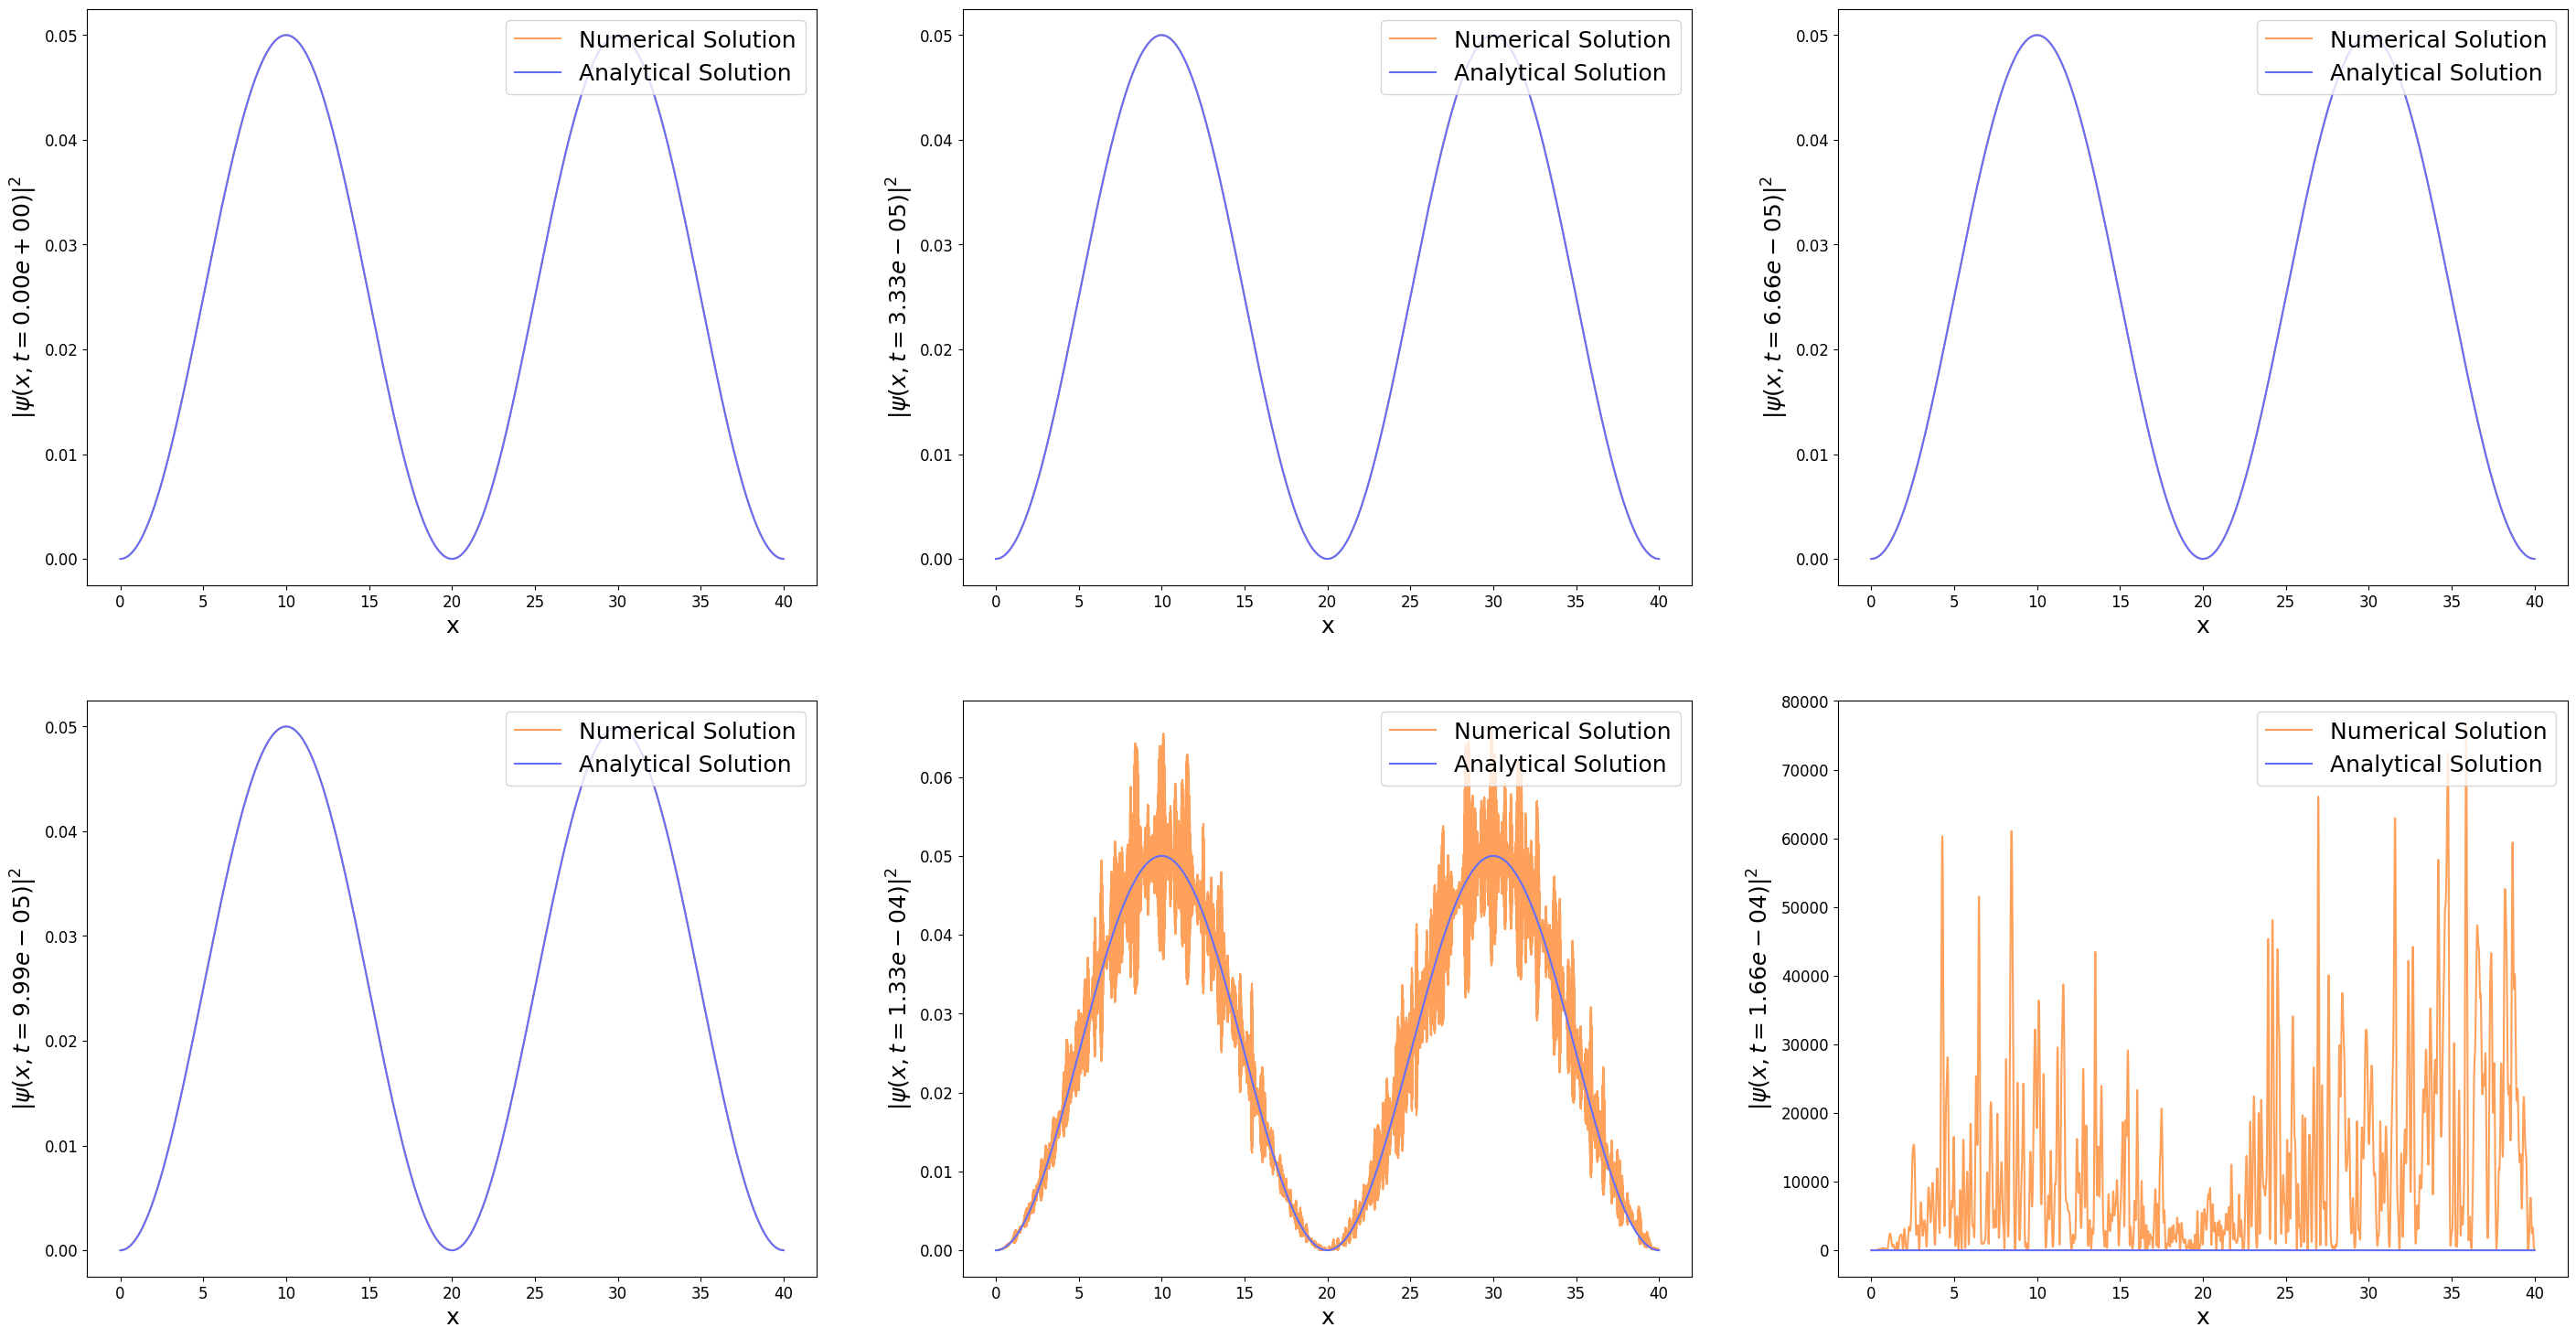

In [144]:
fig, axes = plt.subplots(2, 3, figsize=(35,18))
# fig.suptitle("Finite Difference Method for a Particle in a 1D Well, Stationary State, n = 1")

k = 0
for ax in axes.flat:
    t = k*dt
    psi_pred = [psi.conjugate()*psi for psi in U[k]]
    psi_0_prob = [psi.conjugate()*psi for psi in psi_0]
    

    ax.plot(x_data, psi_pred, label="Numerical Solution", color="#FFA15A")
    ax.plot(x_data, psi_0_prob, label="Analytical Solution", color="#636EFA")
    ax.legend(loc="upper right")

    ax.set_xlabel("x")
    t = np.format_float_scientific(t, precision=2, unique=False, trim='k')
    ax.set_ylabel(f'$|\psi(x, t={t})|^2$')
    k = k + int(K/6)
# plt.show()
plt.savefig(f'finite_difference_method_infinite_square_well_n_{n}.png')

In [141]:
psi_01, x_data = psi_initial(dx, a, n=1)
psi_02, _ = psi_initial(dx, a, n=2)
psi_01 = 0.5*np.array(psi_01)
psi_02 = np.sqrt(3)/np.sqrt(4)*np.array(psi_02)
psi_0 = np.add(psi_01, psi_02)
K = 2000
U = finite_difference(psi_0, dx, dt, N, K)

4001
(4001, 4001)


/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/work/Coding/NeuroPoly/ivadomed/env/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWar

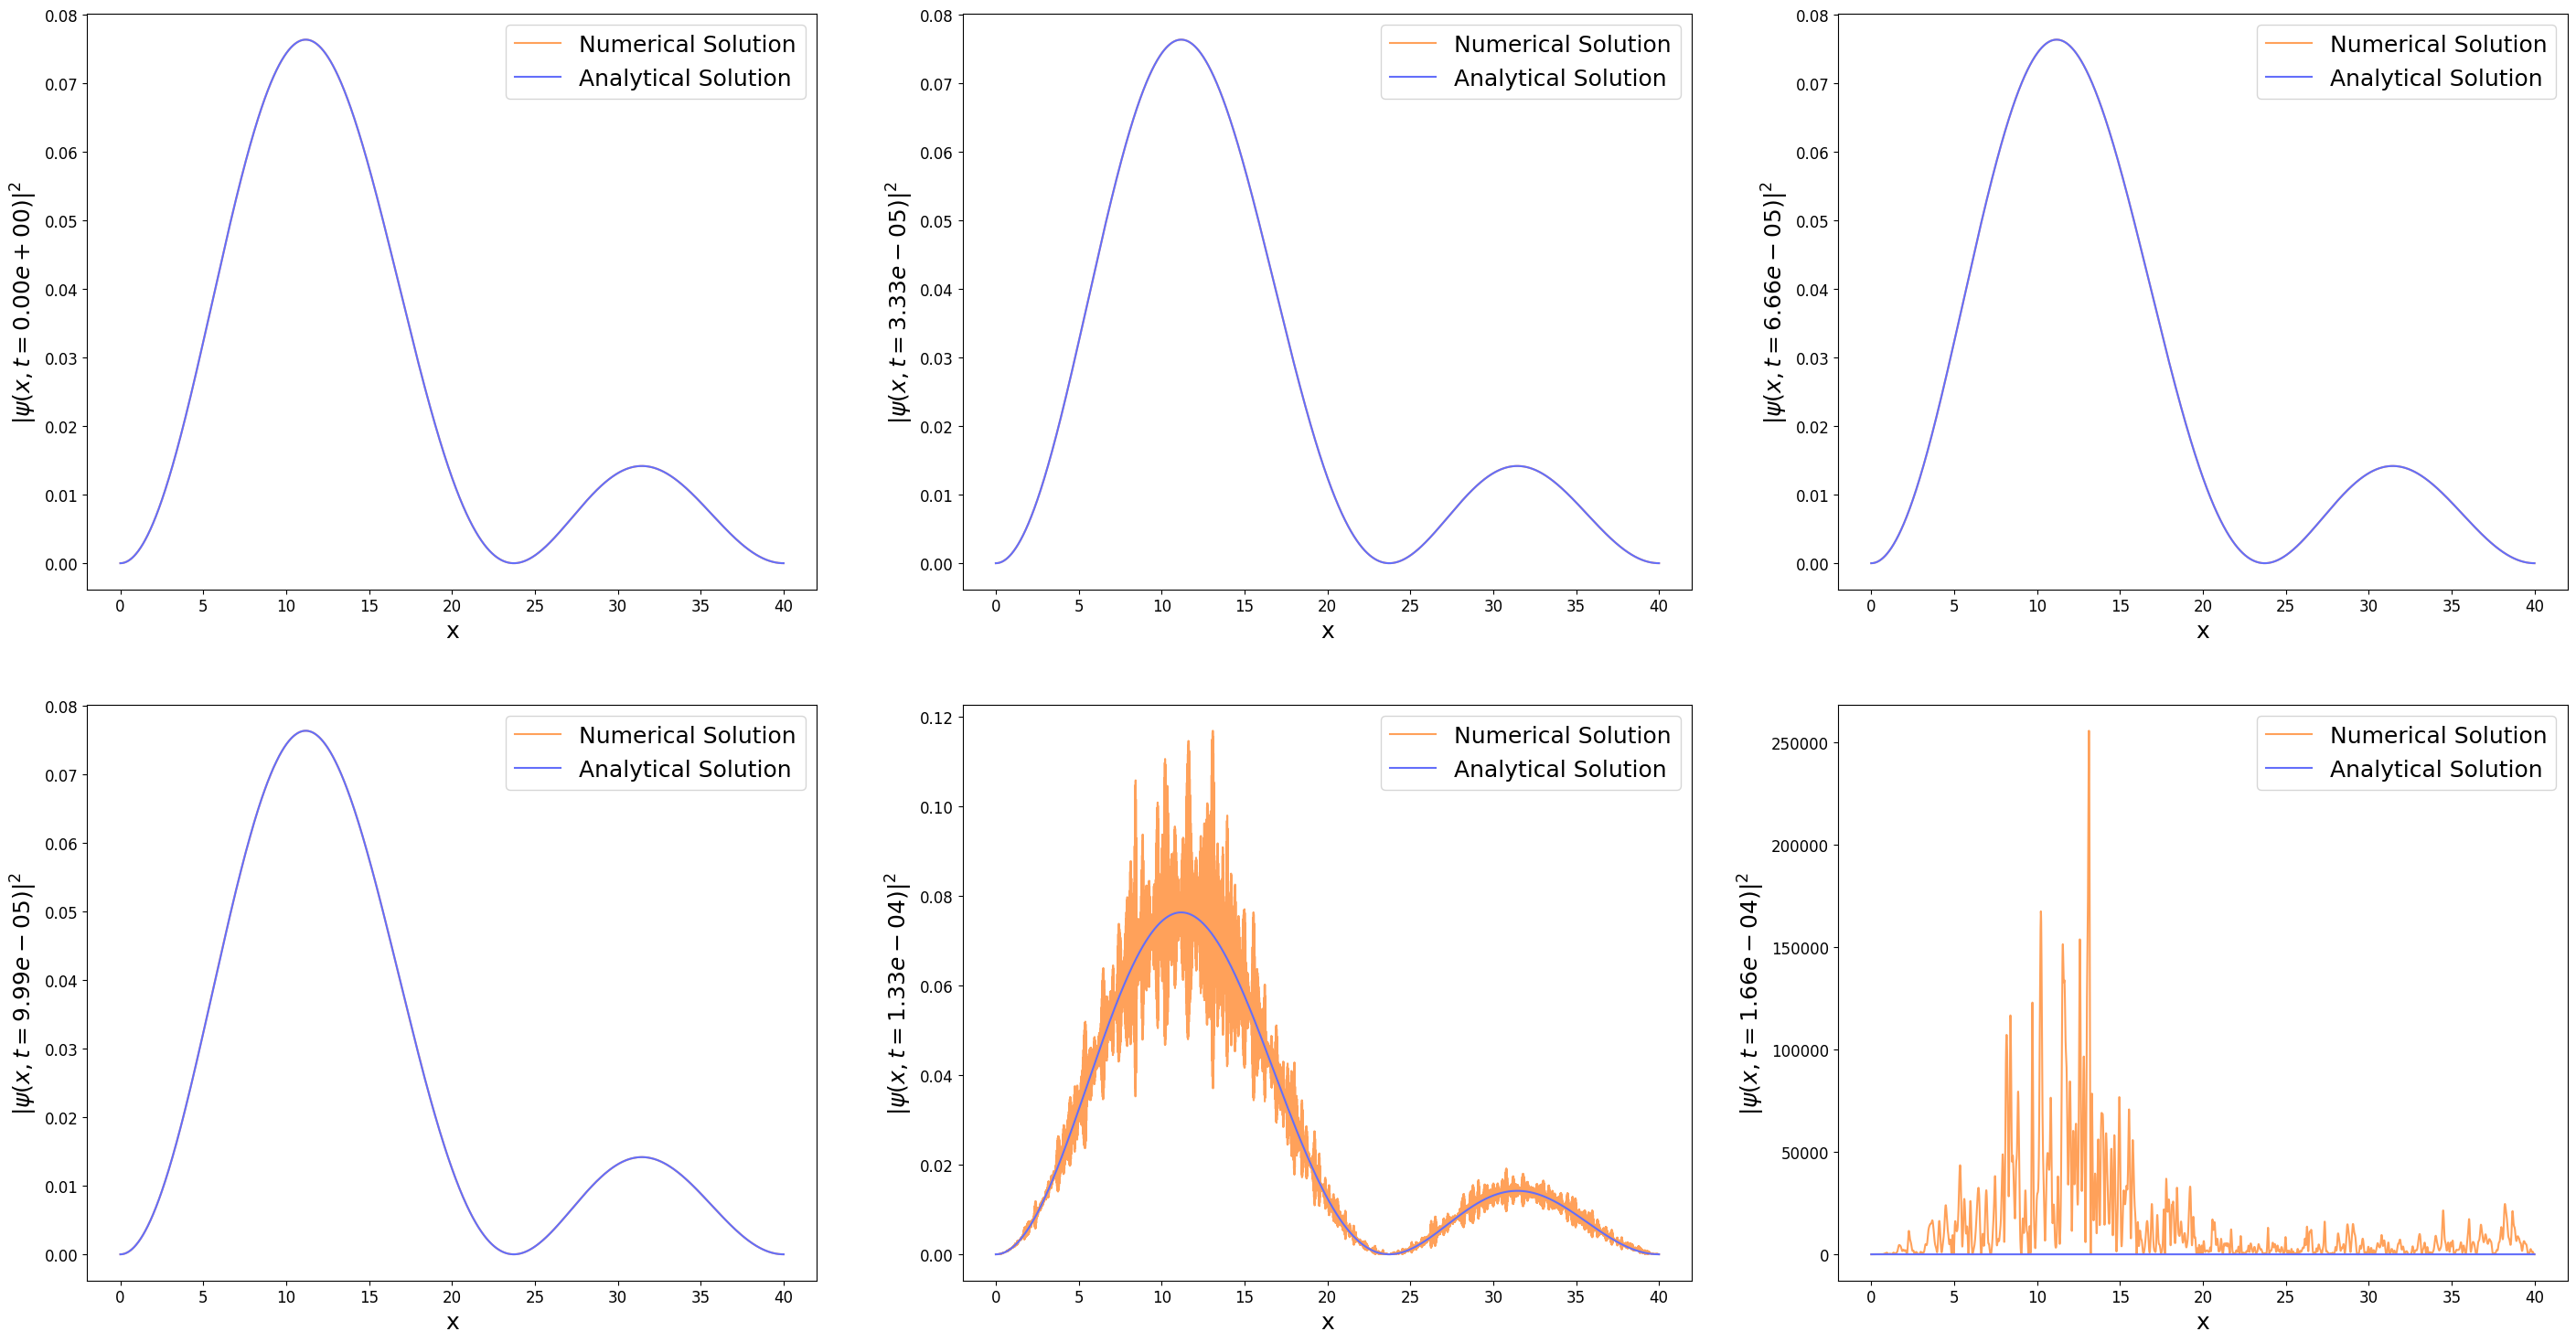

In [142]:
fig, axes = plt.subplots(2, 3, figsize=(35,18))
# fig.suptitle("Finite Difference Method for a Particle in a 1D Well, Stationary State, n = 1")

k = 0
for ax in axes.flat:
    t = k*dt
    psi_pred = [psi.conjugate()*psi for psi in U[k]]
    psi_0_prob = [psi.conjugate()*psi for psi in psi_0]
    

    ax.plot(x_data, psi_pred, label="Numerical Solution", color="#FFA15A")
    ax.plot(x_data, psi_0_prob, label="Analytical Solution", color="#636EFA")
    ax.legend(loc="upper right")

    ax.set_xlabel("x")
    t = np.format_float_scientific(t, precision=2, unique=False, trim='k')
    ax.set_ylabel(f'$|\psi(x, t={t})|^2$')
    k = k + int(K/6)
# plt.show()
plt.savefig(f'finite_difference_method_infinite_square_well_n_{n}.png')

## 4. Hydrogen Atom: Linear Regression

Recall the hydrogen atom is written as:

$$
\begin{align}
\psi(r, \theta, \phi) &= R(r)Y_l^m(\theta, \phi) \label{eq1}\tag{1}
\end{align}
$$

Then:

$$
\begin{align}
u(r) &= rR(r) \\
\dfrac{-\hbar^2}{2m_e}\dfrac{d^2u}{dr^2} + \left[\dfrac{\hbar^2}{2 m_e}\dfrac{l(l+1)}{r^2}-\dfrac{q_e^2}{4 \pi \epsilon_0}\dfrac{1}{r} - E \right]u(r) &= 0 \\
\dfrac{-1}{2}\dfrac{d^2u}{dr^2} + \left[\dfrac{1}{2}\dfrac{l(l+1)}{r^2}-\dfrac{1}{r} - E \right]u(r) &= 0
\end{align}
$$

In [16]:
import linear_regression_hydrogen as lrh

In [21]:
polynomial_degree = 100
r_data = np.arange(0.01, 30, 0.05)
num_data_points = len(r_data)
print(num_data_points)
hydrogen = lrh.Hydrogen()
R_matrix = lrh.create_R_matrix(num_data_points, polynomial_degree, r_data)
T_matrix = lrh.create_T_matrix(num_data_points, polynomial_degree, r_data)
coefficients = np.ones(polynomial_degree)
# Coefficients for n = 1, l = 0
# for n in range(0, polynomial_degree):
#     coefficients[n] = 2 * (-1)**n * (1 / math.factorial(n)) # * 1 / np.sqrt(np.pi)
# print(coefficients)

# Coefficients for n = 2, l = 0
coefficients[0] = 2 / (2 * (np.sqrt(2)))*1.1
# coefficients[0] = 0.65
for n in range(1, polynomial_degree):
    coefficients[n] = ((-1)**n * (2 / math.factorial(n)) + (-1)**n * (1 / math.factorial(n-1))) * (1 / (2 * (np.sqrt(2))))*1.1
print(coefficients)
u_initial = np.matmul(R_matrix, coefficients)
u_pred = u_initial
alpha = 10**(-300)
max_cost = 0.001
max_iterations = 500
coefficients, cost = lrh.gradient_descent(coefficients, alpha, max_cost, max_iterations, lrh.cost_function,
                                    lrh.cost_function_deriv, u_pred, r_data, R_matrix, T_matrix, hydrogen)
u_pred = np.matmul(R_matrix, coefficients)
print(f"cost = {cost}")
print(coefficients)

600
[ 7.77817459e-001 -1.16672619e+000  7.77817459e-001 -3.24090608e-001
  9.72271824e-002 -2.26863426e-002  4.32120811e-003 -6.94479874e-004
  9.64555381e-005 -1.17890102e-005  1.28607384e-006 -1.26658787e-007
  1.13668143e-008 -9.36825351e-010  7.13771696e-011 -5.05588285e-012
  3.34580482e-013 -2.07746051e-014  1.21488919e-015 -6.71386130e-017
  3.51678449e-018 -1.75078016e-019  8.30409561e-021 -3.76091287e-022
  1.62972891e-023 -6.76964316e-025  2.70014257e-026 -1.03576898e-027
  3.82673267e-029 -1.36354842e-030  4.69177952e-032 -1.56077343e-033
  5.02521748e-035 -1.56758121e-036  4.74226248e-038 -1.39256914e-039
  3.97279485e-041 -1.10198435e-042  2.97431672e-044 -7.81711447e-046
  2.00194395e-047 -4.99904703e-049  1.21792951e-050 -2.89676680e-052
  6.72986227e-054 -1.52803636e-055  3.39249516e-057 -7.36845136e-059
  1.56642248e-060 -3.26071619e-062  6.64930360e-064 -1.32885781e-065
  2.60371269e-067 -5.00364073e-069  9.43447411e-071 -1.74599034e-072
  3.17253884e-074 -5.66182067e

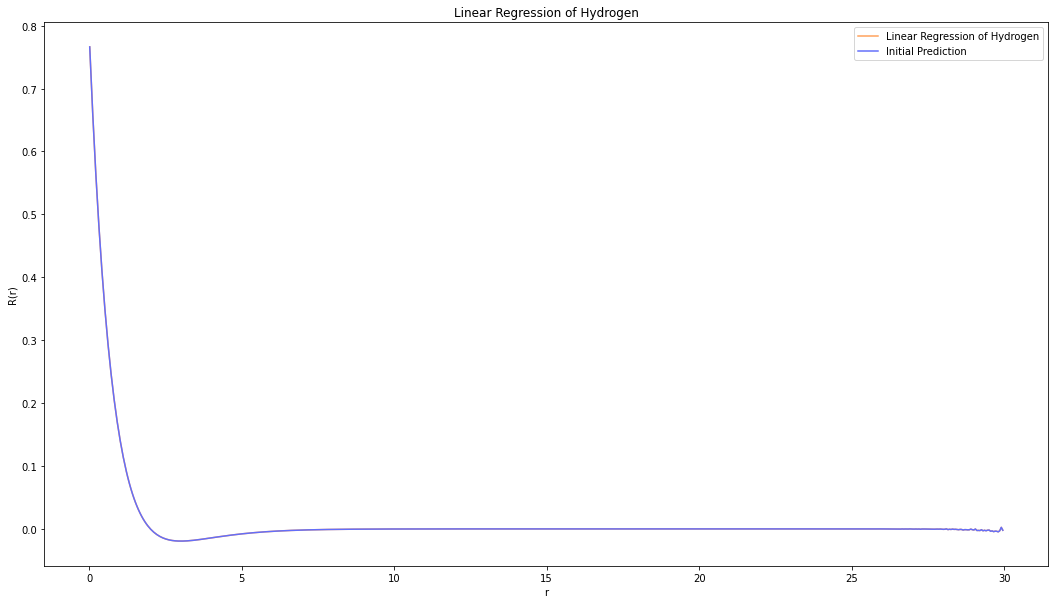

In [18]:
fig = plt.figure(figsize=(18,10))

plt.plot(r_data, u_pred, label="Linear Regression of Hydrogen", color="#FFA15A")
plt.plot(r_data, u_initial, label="Initial Prediction", color="#636EFA")
plt.legend(loc="upper right")

plt.xlabel("r")
plt.ylabel(f"R(r)")
plt.title(f"Linear Regression of Hydrogen")
plt.show()

## 5. Hydrogen Atom: Variational Method

In [ ]:
gaussian_function_a(r, lambda_param):
    return np.exp(-(r-lambda_param)**2)/r

In [ ]:
gaussian_function_b(r, lambda_param):
    return np.exp(-(r-lambda_param))

In [ ]:
set_of_functions = [
    gaussian_function_a,
    gaussian_function_b
]